In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# %matplotlib inline
%matplotlib ipympl

In [2]:
# Filepath to xls file containing list of NVE site IDs to download data for
nve_site_ids_fpath = r"../../data/subcatchments_metadata/Subcatchments_existing_data_metadata.xlsx"
sheet_name = "nve_discharge"

# Download date (for file naming): current month and year
download_date = '2022-05'

# Folder raw downloaded data in
out_folder = '../../data/NVE/raw_download'

,stasjonNavn
stasjonID,
234.14.0,Cærrogæsjokka
234.2.0,Jiesjokka
234.5.0,Njalmigoaika
234.1.0,Polmak
234.18.0,Polmak nye
234.4.0,Smalfjord
234.13.0,"Veahkkava, Iesjokka"
234.6.0,Vækkava
234.16.0,Julelv


In [ ]:
# Stations id list
station_ids_df = pd.read_excel(nve_site_ids_fpath, sheet_name=sheet_name, index_col=0)
stn_ids = station_ids_df.index
station_ids_df

In [16]:
# Read in raw downloaded data
data_dict = {}  # Key: stn_id, returns downloaded data

for stn_id in stn_ids:
    station_name = station_ids_df.loc[stn_id][0]
    fpath = os.path.join(
            out_folder, "%s_rawdata_downloaded_%s.csv" % (station_name, download_date))
    df = pd.read_csv(fpath, index_col=0, parse_dates=True)
    data_dict[station_name] = df

In [19]:
data_dict.keys()

dict_keys(['Cærrogæsjokka', 'Jiesjokka', 'Njalmigoaika', 'Polmak', 'Polmak nye', 'Smalfjord', 'Veahkkava, Iesjokka', 'Vækkava', 'Julelv'])

In [23]:
# Just pick sites of interest for now
current_sites = ['Cærrogæsjokka', 'Polmak nye', 'Veahkkava, Iesjokka']

q_df = pd.DataFrame()
for site in current_sites:
    q_series = data_dict[site]['value']
    q_series.name = site
    q_df[site] = q_series

q_df.head()

,Cærrogæsjokka,Polmak nye,"Veahkkava, Iesjokka"
datetime,,,
1978-01-30 11:00:00+00:00,0.047568,NaN,NaN
1978-01-31 11:00:00+00:00,0.047568,NaN,NaN
1978-02-01 11:00:00+00:00,0.047568,NaN,NaN
1978-02-02 11:00:00+00:00,0.047568,NaN,NaN
1978-02-03 11:00:00+00:00,0.047568,NaN,NaN


array([<AxesSubplot:xlabel='datetime'>, <AxesSubplot:xlabel='datetime'>,
       <AxesSubplot:xlabel='datetime'>], dtype=object)

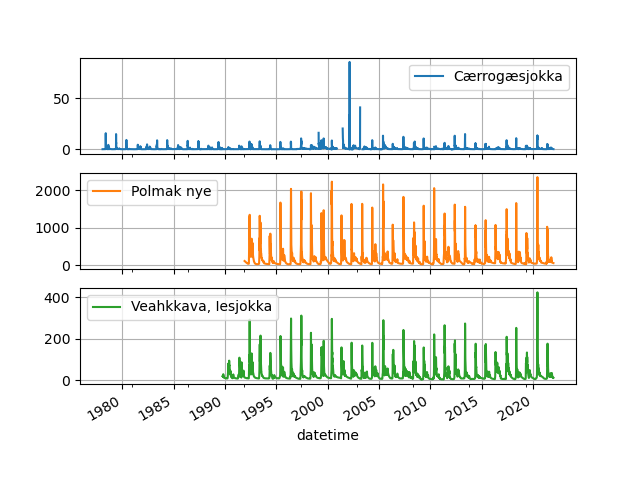

In [26]:
# Quick interactive plot
q_df.plot(subplots=True, grid=True)